Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from crackmnist import CrackMNIST

Load CrackMNIST dataset with size S and pixels 28

In [2]:
train_dataset = CrackMNIST(split="train", size="S", pixels=28)

100%|██████████| 126M/126M [00:01<00:00, 101MB/s]  


The dataset contains planar (2D) displacement fields obtained by digital image correlation during fatigue crack growth experiments. The displacement fields are augmented by crops and rotations and interpolated to a regular grid ($28 \times 28$).

In [3]:
print("The input has the shape", train_dataset.images.shape)

The input has the shape (10048, 2, 28, 28)


As targets the dataset contains the corresponding crack tip locations. The crack tip locations are represented as binary masks with the same size as the inputs.

In [4]:
print(train_dataset.masks.shape)

(10048, 28, 28)


Let us visualize some samples from the dataset.

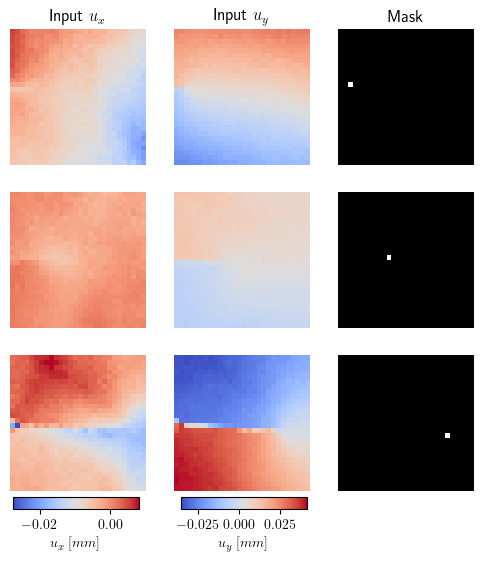

In [5]:
plt.rcParams['text.usetex'] = True  # Enable LaTeX rendering

# Fetch 3 random samples
random_ids = [0, 2000, 4000]
inputs = train_dataset.images[random_ids]
targets = train_dataset.masks[random_ids]


fig, axs = plt.subplots(3, 3, figsize=(6, 6), gridspec_kw={'width_ratios': [1, 1, 1]})

# Normalize each input type separately
vmin_x, vmax_x = inputs[:, 0].min(), inputs[:, 0].max()
vmin_y, vmax_y = inputs[:, 1].min(), inputs[:, 1].max()

norm_x = mcolors.Normalize(vmin=vmin_x, vmax=vmax_x)
norm_y = mcolors.Normalize(vmin=vmin_y, vmax=vmax_y)

for i in range(3):
    im_x = axs[i, 0].imshow(inputs[i, 0], cmap='coolwarm', norm=norm_x)
    if i == 0:
        axs[i, 0].set_title(r"Input $u_x$")
    axs[i, 0].axis('off')

    im_y = axs[i, 1].imshow(inputs[i, 1], cmap='coolwarm', norm=norm_y)
    if i == 0:
        axs[i, 1].set_title(r"Input $u_y$")
    axs[i, 1].axis('off')

    axs[i, 2].imshow(targets[i], cmap='gray')
    if i == 0:
        axs[i, 2].set_title("Mask")
    axs[i, 2].axis('off')


# Create separate axes for colorbars
cbar_ax_x = fig.add_axes([0.13, 0.08, 0.21, 0.02])  # Colorbar for u_x
cbar_ax_y = fig.add_axes([0.41, 0.08, 0.21, 0.02])  # Colorbar for u_y

# Add colorbars
fig.colorbar(im_x, cax=cbar_ax_x, orientation='horizontal', label=r'$u_x\; [mm]$')
fig.colorbar(im_y, cax=cbar_ax_y, orientation='horizontal', label=r'$u_y\; [mm]$')

plt.savefig("../docs/crackmnist_samples.png", dpi=600)
plt.show()

Let us plot the same sample with different resolution (pixels).

In [6]:
train_dataset_28 = CrackMNIST(split="train", size="S", pixels=28)
train_dataset_64 = CrackMNIST(split="train", size="S", pixels=64)
train_dataset_128 = CrackMNIST(split="train", size="S", pixels=128)
train_dataset_256 = CrackMNIST(split="train", size="S", pixels=256)

100%|██████████| 653M/653M [00:05<00:00, 113MB/s]  


100%|██████████| 2.59G/2.59G [03:09<00:00, 13.6MB/s]


100%|██████████| 10.2G/10.2G [02:17<00:00, 74.2MB/s]


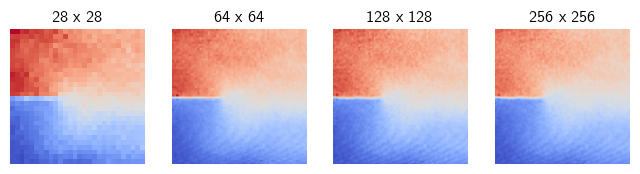

In [7]:
plt.rcParams['text.usetex'] = True  # Enable LaTeX rendering

# Fetch 3 random samples
random_id = 2000
inputs = [dataset.images[random_id] for dataset in [train_dataset_28, train_dataset_64, train_dataset_128, train_dataset_256]]
pixels = [28, 64, 128, 256]

fig, axs = plt.subplots(1, 4, figsize=(8, 2))

for i, (pixel, inp) in enumerate(zip(pixels, inputs)):
    im_x = axs[i].imshow(inp[1], cmap='coolwarm')
    axs[i].set_title(rf"{pixel} x {pixel}")
    axs[i].axis('off')

plt.savefig("../docs/crackmnist_resolution.png", dpi=600)
plt.show()